In [1]:
slices = [59219, 55466, 47544, 36443, 35917]

langs = ['JavaScript', 'HTML/CSS', 'SQL', 'Python', 'Java']

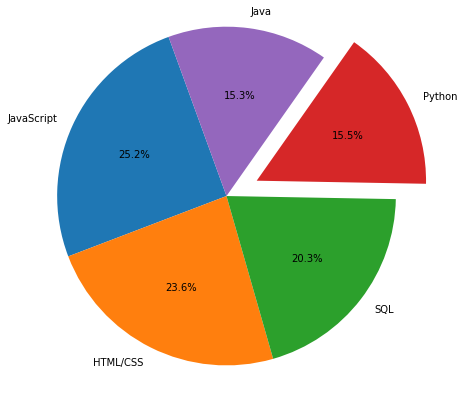

In [20]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = langs
sizes = slices
explode = (0, 0, 0, 0.2, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig, ax = plt.subplots(figsize=(7,7))

ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=110)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [22]:
fig.savefig("mypiechart.png", dpi =200)

# histogram

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


data = pd.read_csv('hist_data.csv')

In [24]:
data.head()

,Responder_id,Age
0,1,14
1,2,19
2,3,28
3,4,22
4,5,30


In [26]:
data.shape

(79210, 2)

In [27]:
data.Age.nunique()

91

In [28]:
data.Age.max()

99

In [58]:
data.Age.min()

1

In [29]:
data.Age.median()

29.0

In [46]:
mean = data.Age.mean()

In [52]:
mean

30.336674662290115

In [43]:
ages = data["Age"]

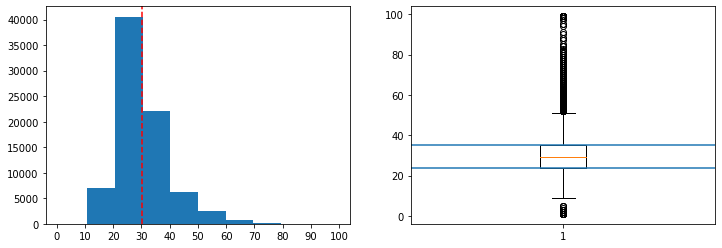

In [60]:
fig, ax = plt.subplots(1,2, figsize=(12,4))

ax[0].hist(ages, bins=10)
ax[0].axvline(mean, color = "red", ls = "--")
ax[0].set_xticks([0,10,20,30,40,50,60,70,80,90,100])
ax[1].boxplot(ages)
ax[1].axhline(24)
ax[1].axhline(35);

In [48]:
from scipy.stats import iqr

q75, q25 = np.percentile(ages, [75, 25])


print("q1:", q25)
print("q3:", q75)
print("iqr:", iqr(ages))

lower_bound = q25-(1.5*iqr(ages))
upper_bound = q75+(1.5*iqr(ages))

print("lower_bound:", lower_bound)
print("upper_bound:", upper_bound)

print("min_value:", min(ages))
print("max_vale:", max(ages))

q1: 24.0
q3: 35.0
iqr: 11.0
lower_bound: 7.5
upper_bound: 51.5
min_value: 1
max_vale: 99


# scatter plot

In [61]:
df = pd.read_csv('scatter_data.csv')

In [62]:
df.head()

,view_count,likes,ratio
0,8036001,324742,96.91
1,9378067,562589,98.19
2,2182066,273650,99.38
3,6525864,94698,96.25
4,9481284,582481,97.22


In [63]:
df.shape

(200, 3)

In [64]:
df.corr()

,view_count,likes,ratio
view_count,1.000000,0.936048,0.038939
likes,0.936048,1.000000,0.090327
ratio,0.038939,0.090327,1.000000


In [65]:
view_count = df["view_count"]

In [66]:
likes = df["likes"]

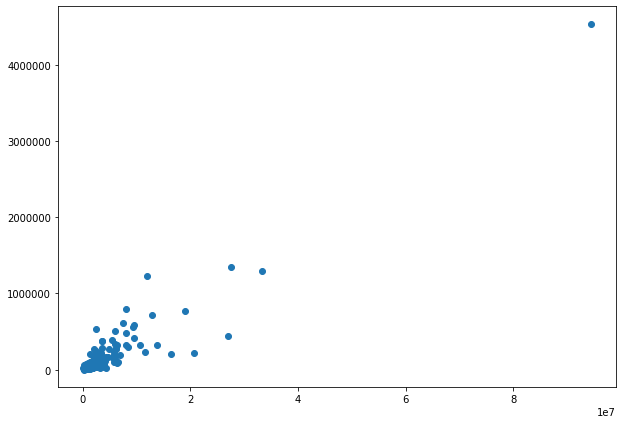

In [67]:
fig, ax = plt.subplots(figsize=(10,7))
ax.scatter(view_count, likes)

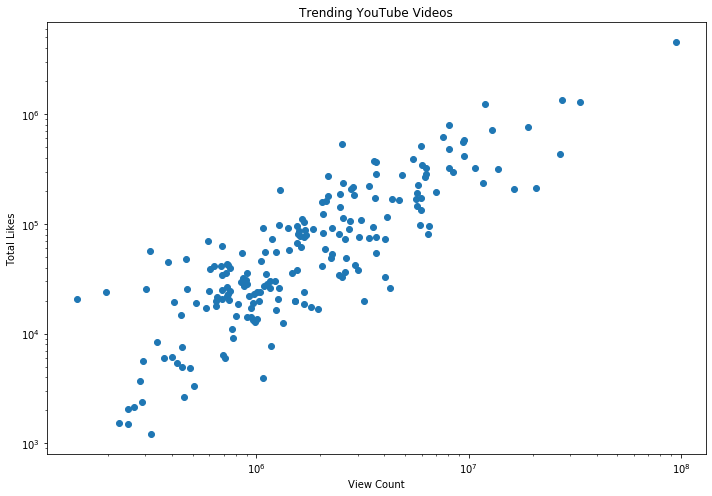

In [68]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.scatter(view_count, likes)


ax.set_xscale('log')
ax.set_yscale('log')


ax.set_title('Trending YouTube Videos')
ax.set_xlabel('View Count')
ax.set_ylabel('Total Likes')
plt.tight_layout()

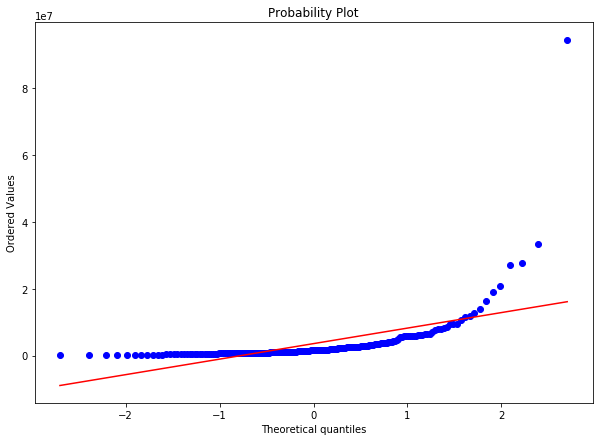

In [72]:
from scipy import stats
fig, ax = plt.subplots(figsize=(10, 7))
reg=stats.probplot(df['view_count'], plot=plt)

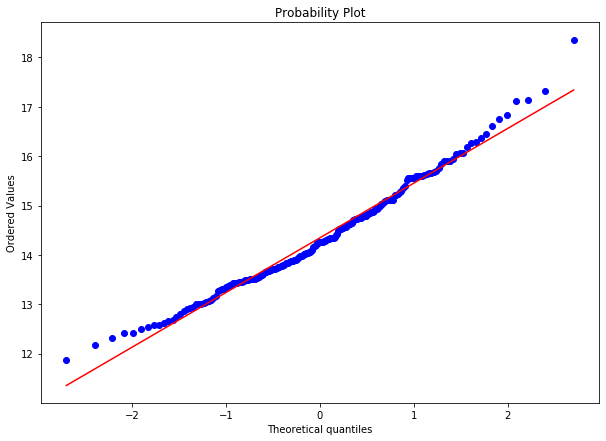

In [73]:
from scipy import stats
fig, ax = plt.subplots(figsize=(10, 7))
reg=stats.probplot(np.log(df["view_count"].values), plot=plt)


# time series 

In [76]:
#pip install pandas-datareader

In [77]:
from pandas_datareader import data
from datetime import datetime

start = datetime(2020, 1, 1)
end = datetime(2020, 8, 30)

In [82]:
f = data.DataReader(name="AAPL", data_source="av-daily", start=start, end=end, api_key = "CI1UUA44YI12JAB3")

In [89]:
f.head()

,open,high,low,close,volume
2020-01-02,296.24,300.60,295.19,300.35,33870100
2020-01-03,297.15,300.58,296.50,297.43,36580700
2020-01-06,293.79,299.96,292.75,299.80,29596800
2020-01-07,299.84,300.90,297.48,298.39,27218000
2020-01-08,297.16,304.44,297.16,303.19,33019800


In [90]:
f.tail()

,open,high,low,close,volume
2020-08-24,514.7900,515.1400,495.745,503.43,86484442
2020-08-25,498.7900,500.7172,492.210,499.30,52873947
2020-08-26,504.7165,507.9700,500.330,506.09,40755567
2020-08-27,508.5700,509.9400,495.330,500.04,38888096
2020-08-28,504.0500,505.7700,498.310,499.23,46907479


In [83]:
g = data.DataReader(name="GOOG", data_source="av-daily", start=start, end=end, api_key = "CI1UUA44YI12JAB3")

In [84]:
g.head()

,open,high,low,close,volume
2020-01-02,1341.55,1368.14,1341.55,1367.37,1406731
2020-01-03,1347.86,1372.50,1345.54,1360.66,1187006
2020-01-06,1350.00,1396.50,1350.00,1394.21,1733149
2020-01-07,1397.94,1402.99,1390.38,1393.34,1511693
2020-01-08,1392.08,1411.58,1390.84,1404.32,1529177


In [85]:
g.tail()

,open,high,low,close,volume
2020-08-24,1593.98,1614.1700,1580.57,1588.20,1410229
2020-08-25,1582.07,1611.6200,1582.07,1608.22,2132084
2020-08-26,1608.00,1659.2200,1603.60,1652.38,3581072
2020-08-27,1653.68,1655.0000,1625.75,1634.33,1861602
2020-08-28,1633.49,1647.1699,1630.75,1644.41,1499782


In [86]:
a = data.DataReader(name="AMZN", data_source="av-daily", start=start, end=end, api_key = "CI1UUA44YI12JAB3")

In [87]:
a.head()

,open,high,low,close,volume
2020-01-02,1875.00,1898.01,1864.15,1898.01,4035910
2020-01-03,1864.50,1886.20,1864.50,1874.97,3766604
2020-01-06,1860.00,1903.69,1860.00,1902.88,4065698
2020-01-07,1904.50,1913.89,1892.04,1906.86,4134010
2020-01-08,1898.04,1911.00,1886.44,1891.97,3511966


In [88]:
a.tail()

,open,high,low,close,volume
2020-08-24,3310.15,3380.3150,3257.5608,3307.46,4666258
2020-08-25,3294.99,3357.4000,3267.0000,3346.49,3992842
2020-08-26,3351.11,3451.7387,3344.5675,3441.85,6508743
2020-08-27,3450.05,3453.0000,3378.0000,3400.00,4264795
2020-08-28,3423.00,3433.3699,3386.5000,3401.80,2896978


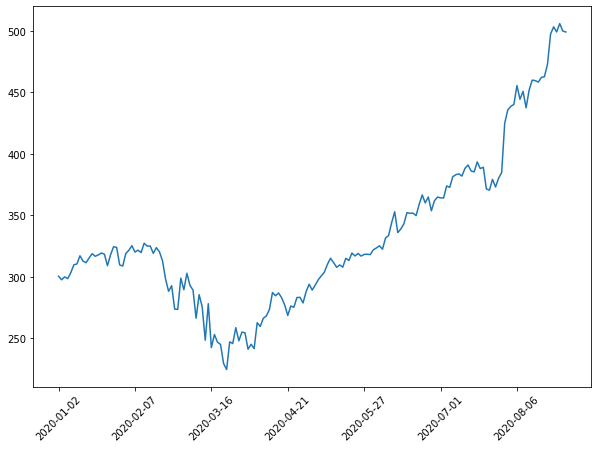

In [94]:
f.close.plot(figsize=(10,7), rot = 45)

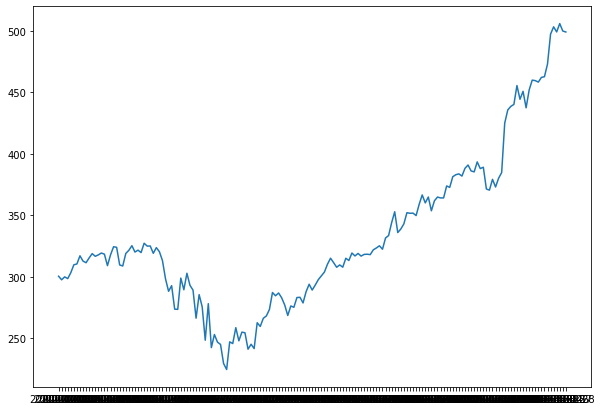

In [95]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,7))
ax.plot(f.close.index, f.close);

In [96]:
f.index

Index(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07', '2020-01-08',
       '2020-01-09', '2020-01-10', '2020-01-13', '2020-01-14', '2020-01-15',
       ...
       '2020-08-17', '2020-08-18', '2020-08-19', '2020-08-20', '2020-08-21',
       '2020-08-24', '2020-08-25', '2020-08-26', '2020-08-27', '2020-08-28'],
      dtype='object', length=167)

In [97]:
f.index = pd.to_datetime(f.index)

In [98]:
f.index

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2020-08-17', '2020-08-18', '2020-08-19', '2020-08-20',
               '2020-08-21', '2020-08-24', '2020-08-25', '2020-08-26',
               '2020-08-27', '2020-08-28'],
              dtype='datetime64[ns]', length=167, freq=None)

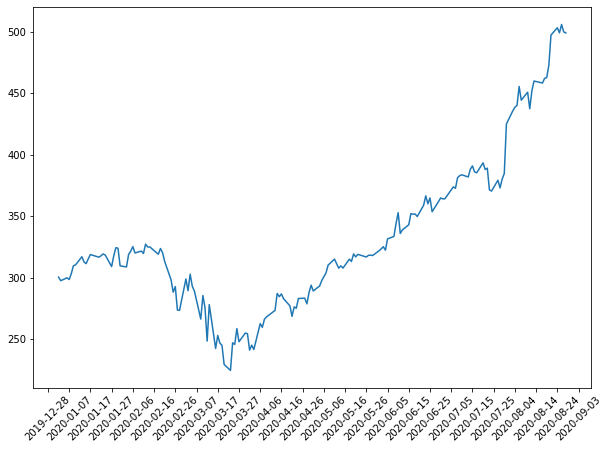

In [101]:
import matplotlib.dates as mdates
import numpy as np

fig, ax = plt.subplots(figsize=(10,7))
#ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
ax.set_xticklabels(f.index, rotation=45)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

ax.plot(f.close.index, f.close);